# Mini-tutorial de Pandas
**Por Ignacio Díaz Blanco. Área de Ingeniería de Sistemas y Automática. Universidad de Oviedo.**

En este mini-tutorial, se muestran algunas operaciones y funcionalidades útiles de Pandas. Pandas es una librería extensísisma para importación, tratamiento, filtrado, análisis y representación de datos en formato matricial (tipo tabla de Excel), incluyendo operaciones de agrupación y agregación multivía propias de cubos de datos. Pandas es, además, una herramienta fantástica para tareas como la importación de datos, así como para la gestión de fechas y datos faltantes, auténticos quebradero de cabeza si se abordan sin librerías.

La documentación oficial de Pandas http://pandas.pydata.org/pandas-docs/stable/, en el momento de redactar esto, tiene en torno a 1500 páginas, por lo que es virtualmente imposible cubrir todas las funciones de esta potente herramienta. Sin embargo, la forma de trabajar con ella es bastante intuitiva y basada en operaciones de alto nivel. El enfoque recomendado para trabajar con Pandas es ponerse "manos a la obra" partiendo de ejemplos sencillos siguiendo un tutorial (este es un ejemplo, pero hay otros muchos en internet) y consultando la documentación cuando se desee realizar una operación que no se conoce o no está cubierta en los tutoriales.

## Ejemplo básico
Empezaremos con un ejemplo básico, tratando una tabla de datos aleatorios, de 10 registros (filas) con 3 atributos o variables (columnas)

In [1]:
# IMPORTACIÓN DE MÓDULOS
# importamos el módulo de pandas y también pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# con esto, las gráficas de matplotlib se muestran en linea en el notebook
%matplotlib inline

In [2]:
# creación de un DataFrame básico
df = pd.DataFrame(np.random.randn(10,3), columns=['x','y','valor'])

# generamos un array de 10 fechas (timestamps)
t = pd.date_range('2016/02/25', periods=10, freq='2h')

# asignamos un índice de timestamps
df.index = t

In [3]:
# MOSTRAMOS EL DATAFRAME COMPLETO
df

,x,y,valor
2016-02-25 00:00:00,0.514590,0.479078,0.714240
2016-02-25 02:00:00,0.344891,-1.354287,0.213668
2016-02-25 04:00:00,1.573006,1.479914,1.363503
2016-02-25 06:00:00,-0.777078,-0.162089,0.961878
2016-02-25 08:00:00,-1.781538,2.266198,-1.163648
2016-02-25 10:00:00,-1.352621,-1.403638,0.792698
2016-02-25 12:00:00,0.256195,-1.253976,0.075306
2016-02-25 14:00:00,-1.429359,0.316394,1.454012
2016-02-25 16:00:00,-0.323145,0.273647,-0.659575
2016-02-25 18:00:00,0.926767,0.517483,-1.721658


In [4]:
# FORMAS RESUMIDAS DE MOSTRAR EL DATAFRAME
# df.head() permite ver solo los primeros registros del dataframe 
df.head()

,x,y,valor
2016-02-25 00:00:00,0.514590,0.479078,0.714240
2016-02-25 02:00:00,0.344891,-1.354287,0.213668
2016-02-25 04:00:00,1.573006,1.479914,1.363503
2016-02-25 06:00:00,-0.777078,-0.162089,0.961878
2016-02-25 08:00:00,-1.781538,2.266198,-1.163648


In [5]:
# SELECCIÓN DE REGISTROS
# mostrar sólo los datos de las 4 de la mañana
df[df.index.hour == 4]

,x,y,valor
2016-02-25 04:00:00,1.573006,1.479914,1.363503


In [6]:
# mostrar sólo los datos con valor > 0.5
df[df['valor']>0.5]

,x,y,valor
2016-02-25 00:00:00,0.514590,0.479078,0.714240
2016-02-25 04:00:00,1.573006,1.479914,1.363503
2016-02-25 06:00:00,-0.777078,-0.162089,0.961878
2016-02-25 10:00:00,-1.352621,-1.403638,0.792698
2016-02-25 14:00:00,-1.429359,0.316394,1.454012


In [7]:
# Resumen del dataframe con unos pocos estadísticos descriptivos
df.describe()

,x,y,valor
count,10.000000,10.000000,10.000000
mean,-0.204829,0.115872,0.203042
std,1.111450,1.214123,1.076481
min,-1.781538,-1.403638,-1.721658
25%,-1.208736,-0.981005,-0.475855
50%,-0.033475,0.295020,0.463954
75%,0.472165,0.507882,0.919583
max,1.573006,2.266198,1.454012


<Axes: >

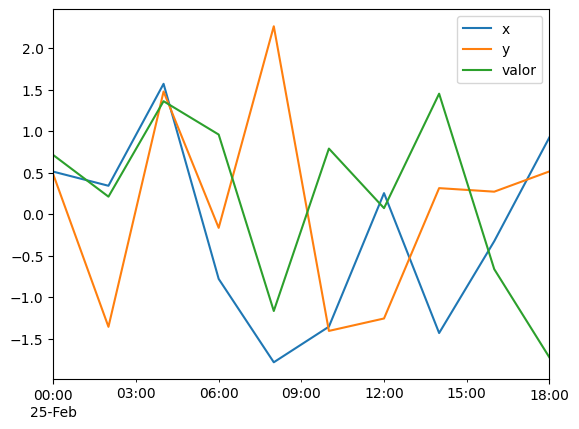

In [8]:
# generar gráficas del dataframe
import matplotlib.pyplot as plt
df.plot()

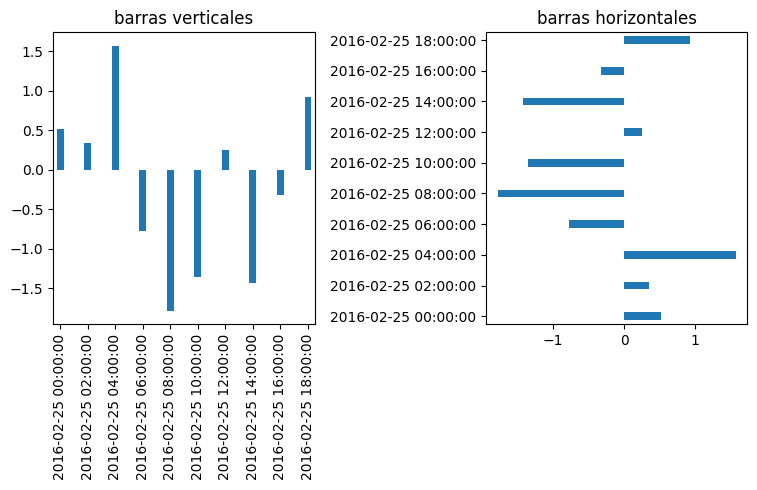

In [9]:

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
df['x'].plot(kind='bar',title='barras verticales')

plt.subplot(1,3,2)
df['x'].plot(kind='barh',title='barras horizontales')

plt.tight_layout()


In [10]:
# DESCRIPTORES ESTADÍSTICOS (media, desviación típica, etc.)

# medias (por columnas)
df.mean()

x       -0.204829
y        0.115872
valor    0.203042
dtype: float64

In [11]:
# lo mismo puede hacerse con la keyword "axis": 0=columnas, 1=filas
df.mean(axis=0)

x       -0.204829
y        0.115872
valor    0.203042
dtype: float64

In [12]:
#medias (por filas)
df.mean(axis=1)

2016-02-25 00:00:00    0.569303
2016-02-25 02:00:00   -0.265243
2016-02-25 04:00:00    1.472141
2016-02-25 06:00:00    0.007570
2016-02-25 08:00:00   -0.226329
2016-02-25 10:00:00   -0.654521
2016-02-25 12:00:00   -0.307492
2016-02-25 14:00:00    0.113682
2016-02-25 16:00:00   -0.236358
2016-02-25 18:00:00   -0.092470
Freq: 2h, dtype: float64

In [13]:
# aplicar una función a cada dato"
df.apply(np.sin)

,x,y,valor
2016-02-25 00:00:00,0.492178,0.460961,0.655043
2016-02-25 02:00:00,0.338094,-0.976653,0.212046
2016-02-25 04:00:00,0.999998,0.995873,0.978592
2016-02-25 06:00:00,-0.701199,-0.161381,0.820267
2016-02-25 08:00:00,-0.977876,0.767797,-0.918254
2016-02-25 10:00:00,-0.976294,-0.986062,0.712250
2016-02-25 12:00:00,0.253401,-0.950231,0.075234
2016-02-25 14:00:00,-0.990014,0.311142,0.993188
2016-02-25 16:00:00,-0.317550,0.270244,-0.612781
2016-02-25 18:00:00,0.799683,0.494694,-0.988642


In [14]:
# aplicar una función a cada columna (por defecto)
df.apply(np.sum)

x       -2.048294
y        1.158723
valor    2.030422
dtype: float64

In [15]:
# aplicar una función a cada columna usando axis=0 (sale lo mismo que antes)
df.apply(np.sum,axis=0)

x       -2.048294
y        1.158723
valor    2.030422
dtype: float64

In [16]:
# aplicar una función a cada fila
df.apply(np.sum,axis=1)

2016-02-25 00:00:00    1.707908
2016-02-25 02:00:00   -0.795728
2016-02-25 04:00:00    4.416423
2016-02-25 06:00:00    0.022711
2016-02-25 08:00:00   -0.678988
2016-02-25 10:00:00   -1.963562
2016-02-25 12:00:00   -0.922476
2016-02-25 14:00:00    0.341047
2016-02-25 16:00:00   -0.709074
2016-02-25 18:00:00   -0.277409
Freq: 2h, dtype: float64

In [17]:
# ordenar el DataFrame por una columna concreta

df.sort_values(by='x')

# otra foram (aunque parece que quedará "obsoleta")
# df.sort(columns='x')


,x,y,valor
2016-02-25 08:00:00,-1.781538,2.266198,-1.163648
2016-02-25 14:00:00,-1.429359,0.316394,1.454012
2016-02-25 10:00:00,-1.352621,-1.403638,0.792698
2016-02-25 06:00:00,-0.777078,-0.162089,0.961878
2016-02-25 16:00:00,-0.323145,0.273647,-0.659575
2016-02-25 12:00:00,0.256195,-1.253976,0.075306
2016-02-25 02:00:00,0.344891,-1.354287,0.213668
2016-02-25 00:00:00,0.514590,0.479078,0.714240
2016-02-25 18:00:00,0.926767,0.517483,-1.721658
2016-02-25 04:00:00,1.573006,1.479914,1.363503


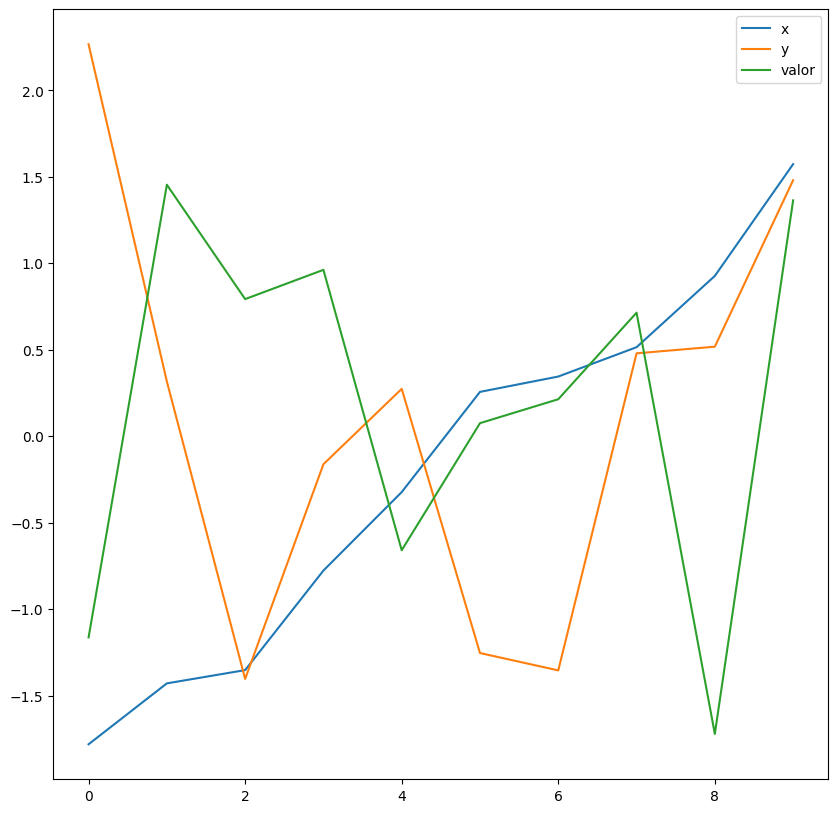

In [18]:
# ... y dibujarla
plt.figure(figsize=(10,10))
plt.plot(df.sort_values(by='x').values)
plt.legend(df.columns)

## Importar datos (archivo 

In [19]:
# IMPORTACIÓN DE LOS DATOS

df = pd.read_csv('../../datos/Activa_columna.csv')
df

,Demanda
0,44.928
1,48.305
2,45.339
3,42.544
4,52.213
...,...
262795,66.394
262796,65.609
262797,60.903
262798,60.352


In [20]:
# ASIGNACIÓN DE FECHAS: el contexto temporal es muy importante

# CREAMOS UN RANGO DE FECHAS (timestamps)
# Sabemos lo siguiente de nuestro fichero *.csv:
# fecha inicial: 1 de marzo de 2010
# número de datos: 262800 (un año entero de datos, a intervalos de 2 minutos)
t = pd.date_range('2010-03-01',periods=262800,freq='2min')


# lo asignamos al índice del dataframe
df.index = t

# creamos "helper columns": categorizan los datos
df['diaSemana'] = df.index.weekday
df['hora'] = df.index.hour
df['mes'] = df.index.month


# mostramos los 10 primeros registros
df.head(10)

,Demanda,diaSemana,hora,mes
2010-03-01 00:00:00,44.928,0,0,3
2010-03-01 00:02:00,48.305,0,0,3
2010-03-01 00:04:00,45.339,0,0,3
2010-03-01 00:06:00,42.544,0,0,3
2010-03-01 00:08:00,52.213,0,0,3
2010-03-01 00:10:00,42.906,0,0,3
2010-03-01 00:12:00,74.516,0,0,3
2010-03-01 00:14:00,45.562,0,0,3
2010-03-01 00:16:00,49.673,0,0,3
2010-03-01 00:18:00,51.468,0,0,3


In [21]:
# REMUESTREO (resample)
# remuestreamos a intervalos 1 hora, de los que tomamos la media como valor agregado
dfr = df.resample('1h').mean()


# mostramos los 10 primeros registros (ahora el periodo de muestreo es 1 hora)
dfr.head(10)


,Demanda,diaSemana,hora,mes
2010-03-01 00:00:00,50.778167,0.0,0.0,3.0
2010-03-01 01:00:00,54.506233,0.0,1.0,3.0
2010-03-01 02:00:00,54.582600,0.0,2.0,3.0
2010-03-01 03:00:00,54.063067,0.0,3.0,3.0
2010-03-01 04:00:00,50.085100,0.0,4.0,3.0
2010-03-01 05:00:00,56.827033,0.0,5.0,3.0
2010-03-01 06:00:00,54.850300,0.0,6.0,3.0
2010-03-01 07:00:00,64.848733,0.0,7.0,3.0
2010-03-01 08:00:00,75.489467,0.0,8.0,3.0
2010-03-01 09:00:00,109.945033,0.0,9.0,3.0


<Axes: >

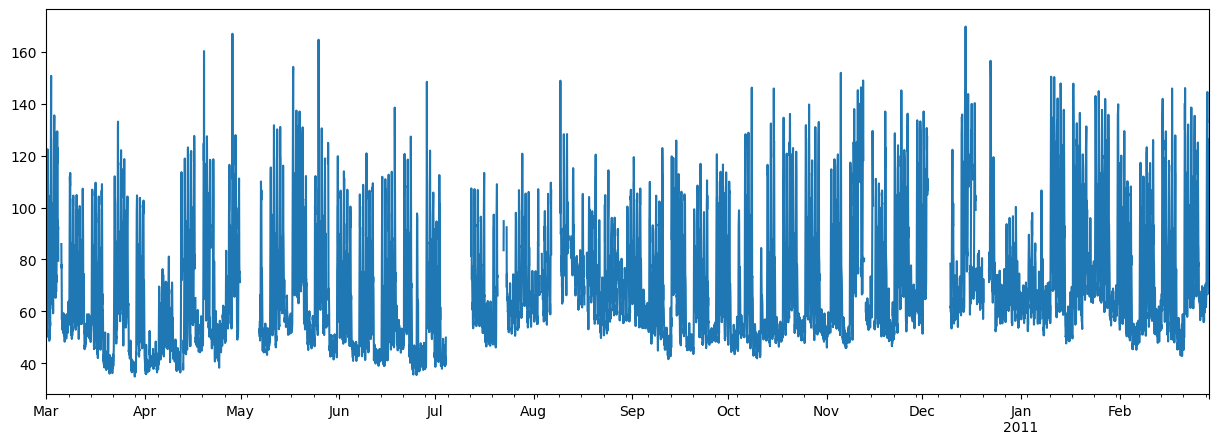

In [22]:
# Dibujamos la potencia activa
plt.figure(figsize=(15,5))
dfr['Demanda'].plot()

<Axes: >

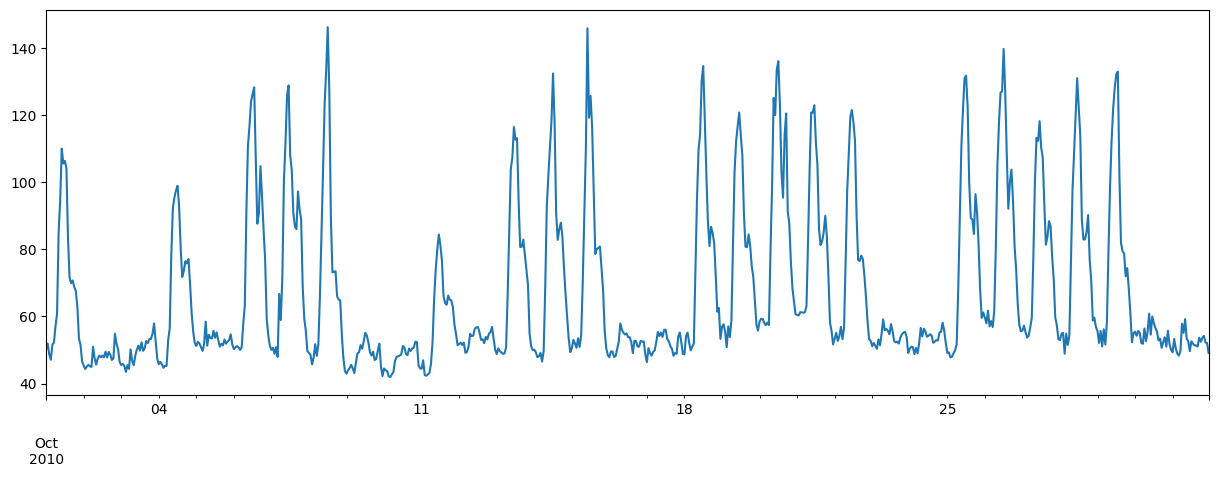

In [23]:
# Dibujamos la potencia activa, solo de octubre (observar, por ejemplo, la fiesta del 12 de Octubre)
plt.figure(figsize=(15,5))
dfr['Demanda']['2010-10'].plot()

<Axes: >

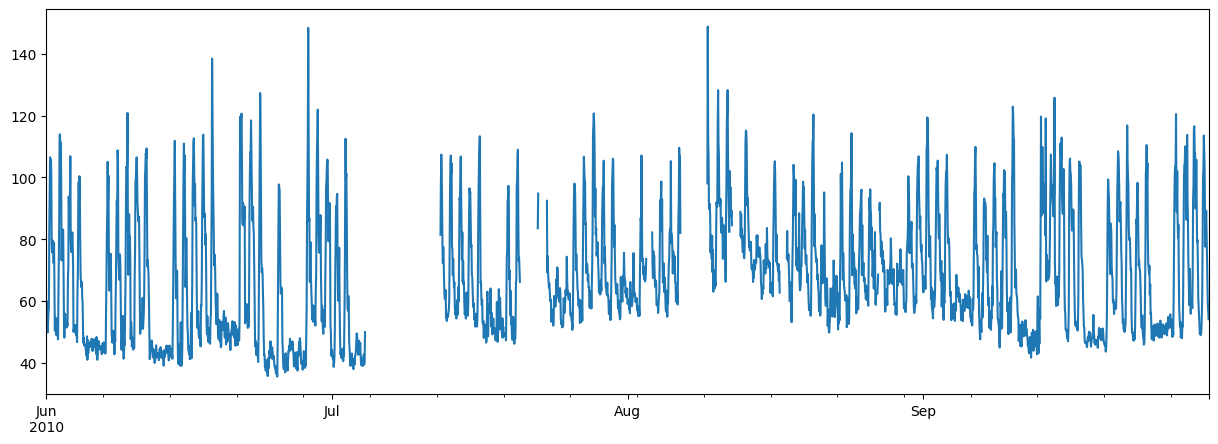

In [24]:
# ... idem para un rango de fechas: de junio a septiembre (inclusive)
plt.figure(figsize=(15,5))
dfr['Demanda']['2010-06-01':'2010-09-30'].plot()

# ... Pandas, gestiona adecuadamente los datos faltantes o erróneos: 
# simplemente, no se dibujan... no se cuentan al hacer medias, etc.

In [25]:
# AGRUPACIÓN+AGREGACIÓN (groupby+aggfun)

# Agregación por horas tipo "mean()"
# permite obtener potencia media consumida en el año para cada hora

# creamos un objeto especial que contiene la "agrupación" por horas
dfg = df.groupby('hora')

# ahora aplicamos una agregación "media" para cada grupo (debe devolvernos 24 valores)
dfg['Demanda'].mean()

hora
0     55.179677
1     55.158603
2     54.651936
3     54.254461
4     54.090856
5     54.201254
6     55.329956
7     63.937230
8     75.215485
9     86.098519
10    92.298551
11    94.496136
12    95.286463
13    91.983943
14    79.965226
15    76.188096
16    75.869989
17    76.603033
18    75.770874
19    72.114030
20    66.109925
21    59.811713
22    57.692601
23    56.694491
Name: Demanda, dtype: float64

<Axes: xlabel='mes'>

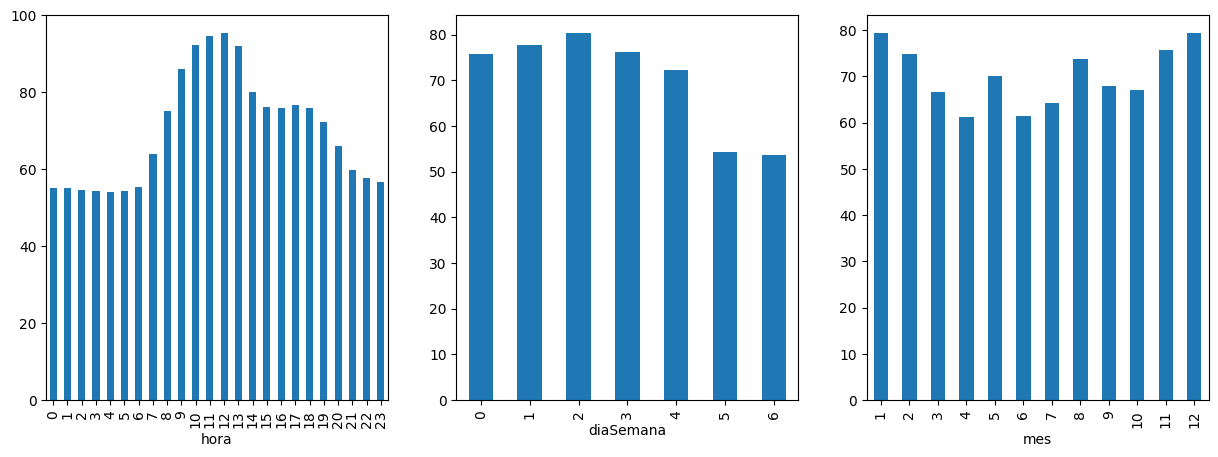

In [26]:
# Podemos hacer el "groupby" y la agregación en una sola instrucción, y además dibujarlas

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df.groupby('hora').mean()['Demanda'].plot(kind='bar')

plt.subplot(1,3,2)
df.groupby('diaSemana').mean()['Demanda'].plot(kind='bar')

plt.subplot(1,3,3)
df.groupby('mes').mean()['Demanda'].plot(kind='bar')

In [27]:
# PIVOT TABLE (tabla pivote)

# Una tabla pivote implica 
#
# 1) una agrupación 2D (o más dimensiones) de los datos conforme 
#    a variables distintas (por ejemplo, "dia de la semana" y "hora"). 
#    Cada casilla de la tabla describe una combinación de las dos variables de agrupación 
#    (ej. "lunes a las 10:00" o bien "martes a las 20:00") 
#
# 2) La agregación de todos los registros vinculados a cada casilla (media, suma, máximo, etc.)


# creamos una tabla pivote de horas vs. dia de la semana
# una tabla pivote es una agregación por más de una variable
dfp = df.pivot_table(columns='hora',index='diaSemana')['Demanda']
dfp

hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
diaSemana,,,,,,,,,,,,,,,,,,,,,
0,52.756525,53.490823,52.235645,51.671857,51.532305,53.135120,53.030487,64.759019,81.733451,98.589276,...,89.218067,82.973091,85.360044,87.277891,86.380820,80.504600,72.793031,63.719809,59.548752,58.577906
1,55.947412,55.819606,56.123508,56.420952,55.253161,56.487234,56.671527,68.351863,84.593915,98.829707,...,91.865376,87.292555,87.481784,89.911939,88.093048,82.799715,73.576877,63.642212,60.263539,60.112951
2,59.382106,58.884500,58.035345,57.729025,57.600982,57.572260,59.431752,71.184183,86.649201,102.950258,...,96.239588,91.369228,90.424707,92.054479,89.329499,84.054015,74.074887,63.733468,60.756020,59.321611
3,57.433899,56.439829,57.254886,56.122156,56.495535,56.222380,57.464490,69.462737,83.999601,99.110263,...,88.858823,84.104829,84.509307,85.797778,84.658991,78.780748,69.488715,60.382226,58.874763,57.261523
4,56.373029,56.612067,55.185088,55.045963,55.594885,54.111130,57.673870,67.227021,82.795758,96.797973,...,83.431610,75.017115,73.344554,73.010514,71.817879,67.742015,63.422069,57.412776,55.053495,54.067106
5,53.117947,53.072754,52.298877,52.120435,51.680894,51.110793,51.605857,53.366454,54.333631,53.922986,...,55.860315,56.967806,55.361675,53.970227,54.696823,55.297920,55.069129,54.689415,54.005117,53.290272
6,51.328212,51.862797,51.479926,50.751190,50.549556,50.865350,51.475521,53.572717,53.460249,53.119957,...,54.216537,55.407495,54.363187,53.827595,55.207566,55.852986,55.245520,55.522576,55.341233,54.135930


In [28]:
# La tabla pivote aporta una información muy interesante y elocuente 
# sobre el comportamiento general de los datos (en este caso, la demanda eléctrica)

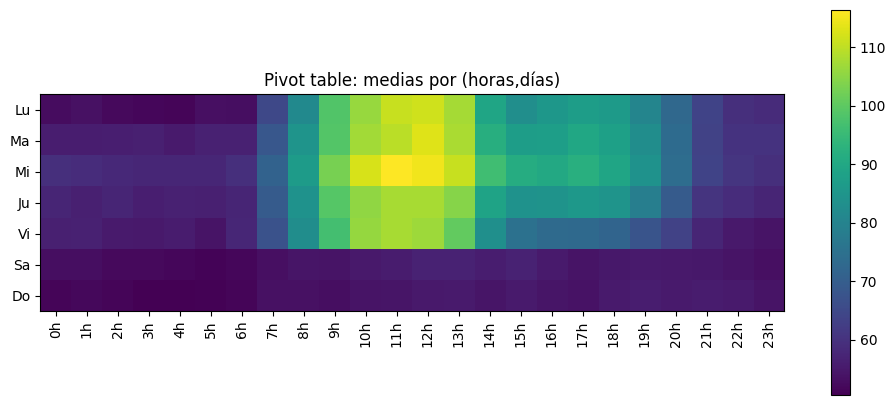

In [29]:
# Una forma interesante de representar la tabla pivote es mediante una visualización "heatmap" ("mapa de calor")
plt.figure(figsize=(12,5))
plt.title(u'Pivot table: medias por (horas,días)')
plt.imshow(dfp,interpolation='none')
horas = range(24)
etiqhoras = map(lambda x: str(x)+'h',horas)
dias = range(7)
etiqdias = ['Lu','Ma','Mi','Ju','Vi','Sa','Do']
plt.xticks(horas,etiqhoras,rotation=90)
plt.yticks(dias,etiqdias)
plt.colorbar()
plt.draw()
plt.show()

## Filtrado
Todos los análisis anteriores podemos aplicarlos a un subconjunto de los datos, generalmente tomando una "rodaja" (*slice*) en una de las variables. Por ejemplo podemos crear un nuevo dataframe que contenga solamente los datos del mes de abril y hacer sobre él todas las operaciones anteriores (medias por horas, días de la semana, etc.) que permitirán describir, lógicamente,  el comportamiento de la demanda en dicho mes. Esta operación de selección de un subconjunto de los datos suele denominarse *filtrado*.

hora
0     48.521169
1     48.604296
2     48.853590
3     47.990911
4     48.095119
5     48.529061
6     47.973360
7     54.547527
8     62.026300
9     73.006429
10    78.648018
11    84.271363
12    84.070186
13    81.495141
14    71.292965
15    66.642274
16    67.562238
17    68.207335
18    67.714786
19    64.535283
20    57.500858
21    49.119346
22    49.342386
23    48.834485
Name: Demanda, dtype: float64


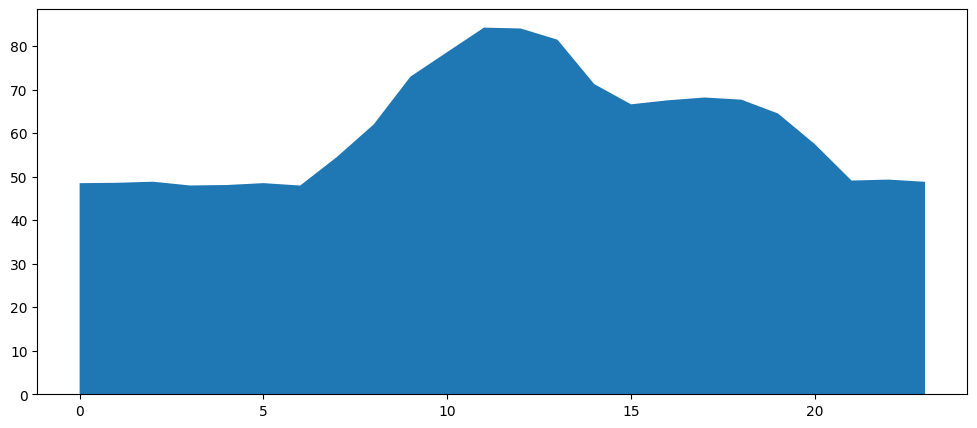

In [30]:
# Ejemplo: calcular y visualizar el consumo promedio por horas durante el mes de abril
plt.figure(figsize=(12,5))
consumo_por_horas_en_abril = df.loc['2010-04'].groupby('hora').mean()['Demanda']

print(consumo_por_horas_en_abril)

dfg = df.loc['2010-04'].groupby('hora')
plt.stackplot(dfg.groups.keys(),dfg.mean()['Demanda'])

### Filtrado iterativo, mes a mes
En el siguiente ejemplo realizamos un bucle que itere por meses y que muestre los perfiles de consumo medio horario correspondientes a cada mes

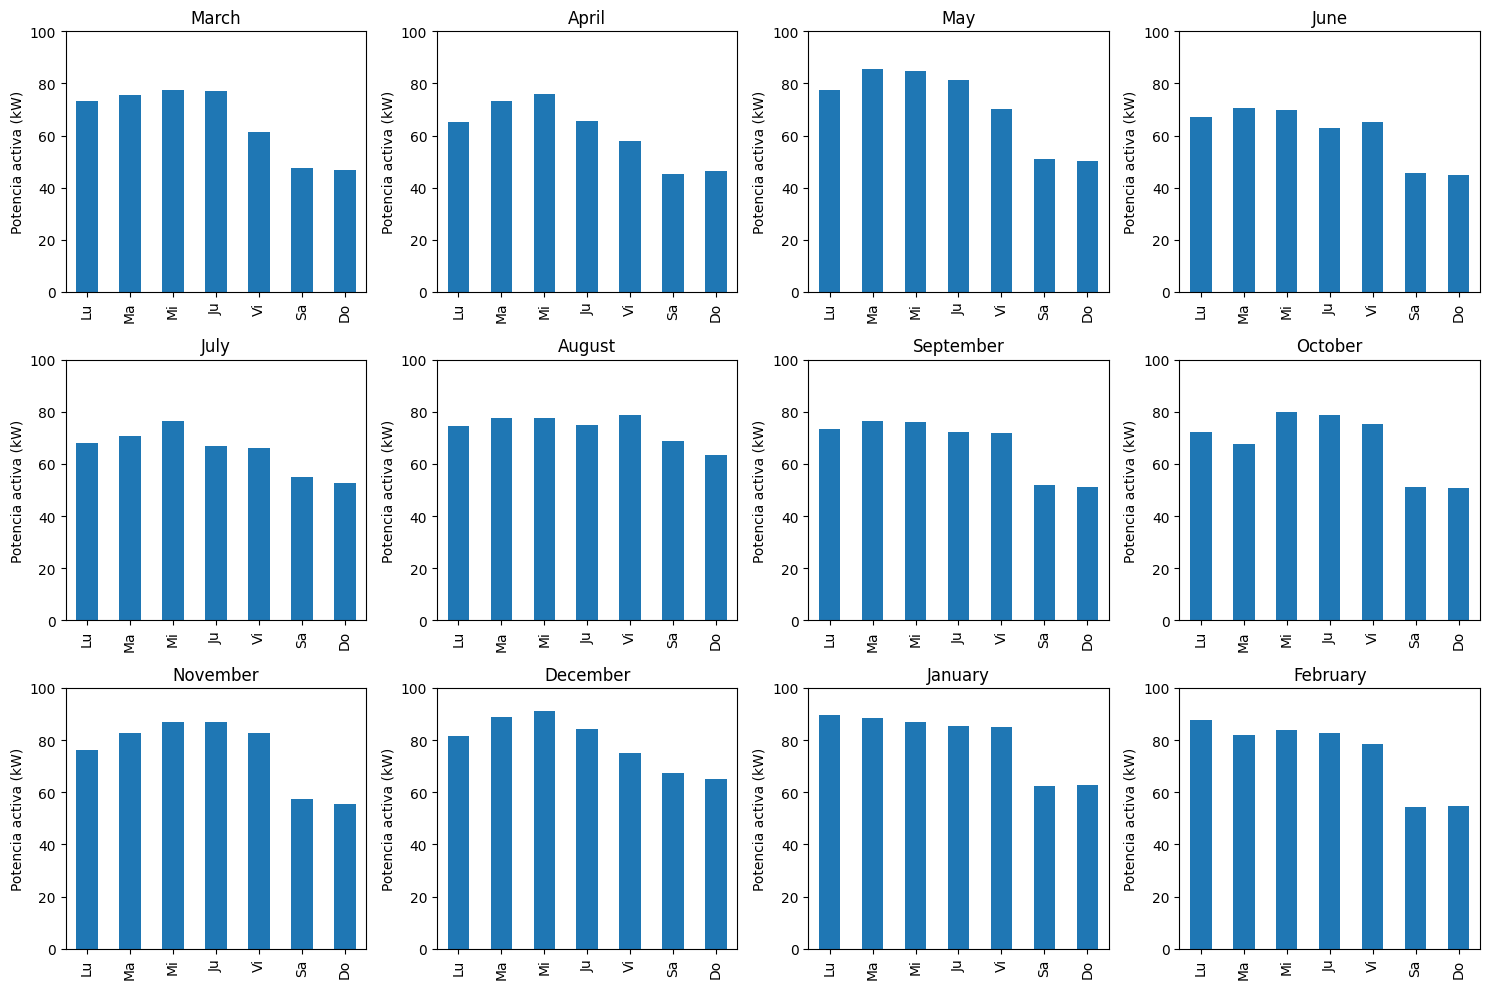

In [31]:
# FILTRADO MES A MES

# consultar la página https://docs.python.org/2/library/datetime.html 
# formatos de fechas

# generamos 12 timestamps: uno por mes, empezando por el timestamp del primer registro (1 de marzo de 2010), 
# generando un total de 12 timestamps y seleccionando intervalos de 1 mes
t = pd.date_range('2010-03-01',periods=12,freq='1ME')

# generamos una lista de cadenas con los nombres de los meses a partir de los timestamps anteriores
# utilizamos los códigos estándar de %Y (=año con 4 cifras) y %m (= mes con 2 cifras)... hay más códigos 
# de estos... pueden consultarse en internet.
tstring = [datetime.datetime.strftime(i,'%Y/%m') for i in t]


# dibujamos los patrones de consumo por meses
plt.figure(figsize=(15,10))

for i,mes in enumerate(tstring):
    plt.subplot(3,4,i+1)
    
    # filtramos el dataFrame: nos quedamos solo con el mes en curso
    dfMes = df.loc[mes]
    
    # agregamos (medias) por dias de la semana... y dibujamos gráfica de barras
    dfMes.groupby('diaSemana').mean()['Demanda'].plot(kind='bar')
    
    # muy importante: igualamos la escala "y" en todos los subplots para hacerlos comparables
    plt.axis(ymax=100)
    plt.xticks(dias,etiqdias)
    plt.title(t[i].strftime('%B'))
    plt.xlabel('')
    plt.ylabel('Potencia activa (kW)')
    
plt.tight_layout()

Esto son datos reales de consumo. Se observan patrones reconocibles, como el menor consumo en fin de semana.

In [32]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Mini-tutorial de Pandas</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.